# Import Python Libraries

In [98]:
#Import data libraries
import pandas as pd
import numpy as np 

#Import data visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns

#Import data preprocessing modules
from sklearn.preprocessing import MultiLabelBinarizer

#Import machine learning preprocessing modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_validate

#Import machine learning models
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

#Import machine learning models metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Creating Dataframes

In [99]:
data = pd.read_csv("data/listings_Sep_22.csv")

#original datatypes 
data.dtypes

/var/folders/sj/tbs4vnjn7h7f5_2xqbzb2r6c0000gn/T/ipykernel_14161/3987399611.py:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/listings_Sep_22.csv")


id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [100]:
#Data preprocessing
data['host_response_rate'] = pd.to_numeric(data['host_response_rate'].str.replace("%",''))
data['instant_bookable'] = np.where(data['instant_bookable'] == 't', True, False)
data['price'] = data['price'].str.replace("$","")
data['price'] = pd.to_numeric(data['price'].str.replace(",",""))

/var/folders/sj/tbs4vnjn7h7f5_2xqbzb2r6c0000gn/T/ipykernel_14161/1408245765.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace("$","")


In [101]:
#updated column datatypes 
data.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [102]:
important_columns = [
    # 'name',
    # 'description',
    'host_location',
    'host_response_time',
    'host_response_rate',
    'host_neighbourhood',
    'neighbourhood_cleansed',
    'neighbourhood_group_cleansed',
    'latitude',
    'longitude',
    'property_type',
    'room_type',
    'accommodates',
    # 'bathrooms_text',
    'bedrooms',
    'beds',
    # 'amenities',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'instant_bookable',
    'price'
    ]
df = data[important_columns]

df.head()

,host_location,host_response_time,host_response_rate,host_neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,availability_30,availability_60,availability_90,availability_365,instant_bookable,price
0,"New York, NY",within an hour,100.0,Gravesend,Kensington,Brooklyn,40.64529,-73.97238,Private room in rental unit,Private room,2,1.0,1.0,21,51,81,356,False,299.0
1,"New York, NY",within a day,75.0,Midtown,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1.0,0,0,5,280,False,175.0
2,"New York, NY",within an hour,100.0,Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,1.0,1.0,5,30,60,335,False,60.0
3,"New York, NY",within an hour,100.0,Ridgewood,Ridgewood,Queens,40.70309,-73.89963,Entire townhouse,Entire home/apt,16,5.0,10.0,30,60,90,365,False,425.0
4,"New York, NY",NaN,NaN,Greenwood Heights,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,2.0,2.0,0,0,0,179,False,275.0


In [103]:
#percentage of empty cells
df.isna().sum()/len(df)*100

host_location                   17.258845
host_response_time              33.971064
host_response_rate              33.971064
host_neighbourhood              20.638901
neighbourhood_cleansed           0.000000
neighbourhood_group_cleansed     0.000000
latitude                         0.000000
longitude                        0.000000
property_type                    0.000000
room_type                        0.000000
accommodates                     0.000000
bedrooms                         9.485720
beds                             2.216594
availability_30                  0.000000
availability_60                  0.000000
availability_90                  0.000000
availability_365                 0.000000
instant_bookable                 0.000000
price                            0.000000
dtype: float64

In [104]:
#percentage of duplicated rows
df.duplicated().sum()/len(df)*100

0.4463278252802086

In [105]:
#create a new dataframe with no duplicates and empty cells
full_df = df.dropna().drop_duplicates().reset_index(drop=True)
full_df.head()

,host_location,host_response_time,host_response_rate,host_neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,availability_30,availability_60,availability_90,availability_365,instant_bookable,price
0,"New York, NY",within an hour,100.0,Gravesend,Kensington,Brooklyn,40.64529,-73.97238,Private room in rental unit,Private room,2,1.0,1.0,21,51,81,356,False,299.0
1,"New York, NY",within an hour,100.0,Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,1.0,1.0,5,30,60,335,False,60.0
2,"New York, NY",within an hour,100.0,Ridgewood,Ridgewood,Queens,40.70309,-73.89963,Entire townhouse,Entire home/apt,16,5.0,10.0,30,60,90,365,False,425.0
3,"New York, United States",within an hour,99.0,Greenpoint,Greenpoint,Brooklyn,40.73777,-73.95366,Room in boutique hotel,Hotel room,2,1.0,1.0,15,42,72,217,False,308.0
4,"New York, NY",within a few hours,100.0,Hell's Kitchen,Midtown,Manhattan,40.76457,-73.98317,Private room in rental unit,Private room,2,1.0,1.0,2,4,7,160,False,68.0


# EDA of Features

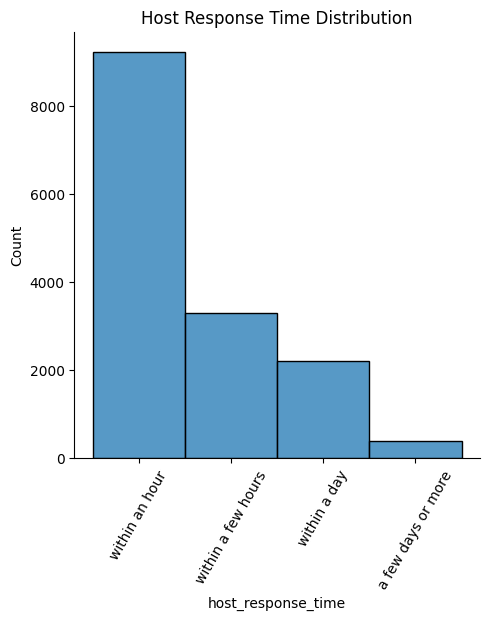

In [106]:
sns.displot(data=full_df, x='host_response_time')
plt.xticks(rotation=60)
plt.title("Host Response Time Distribution")
plt.show()

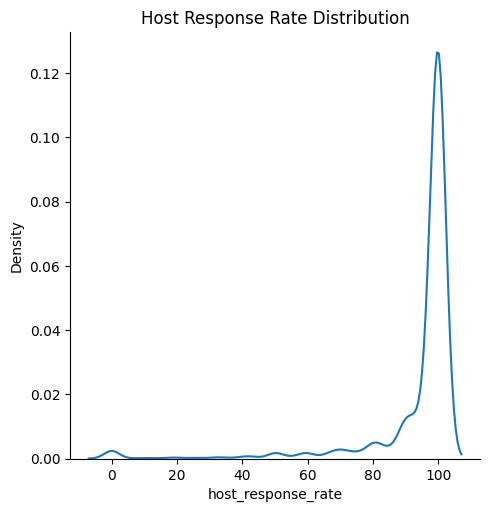

In [107]:
#distribution of host response rate
sns.displot(data=full_df, x='host_response_rate', kind="kde")
plt.title("Host Response Rate Distribution")
plt.show()

In [108]:
#top 25 host neighborhood
full_df.host_neighbourhood.value_counts().head(25)

Bedford-Stuyvesant    1102
Williamsburg           785
Jamaica                633
Bushwick               629
Flushing               565
Flatbush               516
Upper East Side        503
Crown Heights          489
Harlem                 487
Cambridge              458
Greenpoint             444
Elmhurst               385
Astoria                308
Hell's Kitchen         278
Long Island City       233
Park Slope             227
Upper West Side        212
Clinton Hill           202
East Harlem            201
East Flatbush          176
Ocean Hill             168
Hamilton Heights       168
East New York          161
Sunset Park            138
The Rockaways          134
Name: host_neighbourhood, dtype: int64

In [109]:
#top 25 host location
full_df.host_location.value_counts().head(25)

New York, NY                 11058
New York, United States       2493
United States                  244
Miami, FL                       79
Los Angeles, CA                 69
San Francisco, CA               60
Jersey City, NJ                 44
Hawthorne, NJ                   43
Yonkers, NY                     39
Philadelphia, PA                20
Mount Vernon, NY                19
Washington, DC                  19
Florida, United States          16
London, United Kingdom          16
California, United States       15
Atlanta, GA                     14
Chicago, IL                     13
Valley Stream, NY               13
Mineola, NY                     13
Orlando, FL                     12
Houston, TX                     12
Paris, France                   12
Bayonne, NJ                     12
Greenville, DE                  11
Wantagh, NY                     11
Name: host_location, dtype: int64

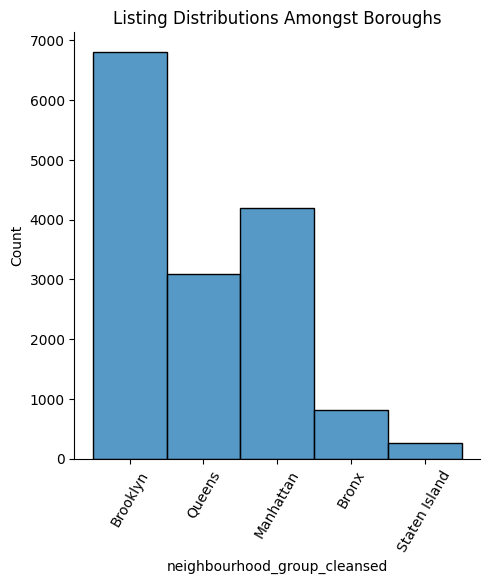

In [110]:
#distribution of listings based borough
sns.displot(data=full_df, x='neighbourhood_group_cleansed')
plt.xticks(rotation=60)
plt.title("Listing Distributions Amongst Boroughs")
plt.show()

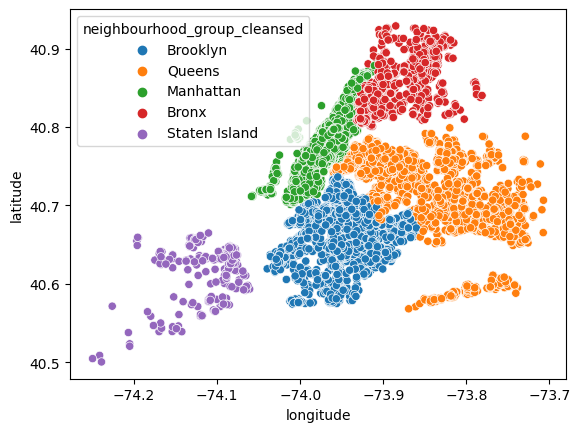

In [111]:
#scatter plot of listings 
sns.scatterplot(data=full_df, y='latitude', x='longitude', hue='neighbourhood_group_cleansed')
plt.show()

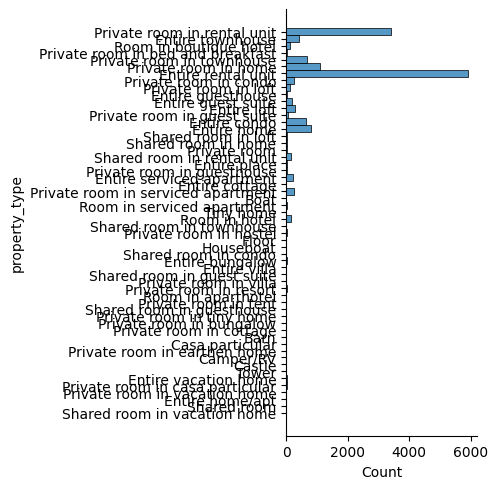

In [112]:
# distribution of property_type
sns.displot(data=full_df, y='property_type')
plt.show()

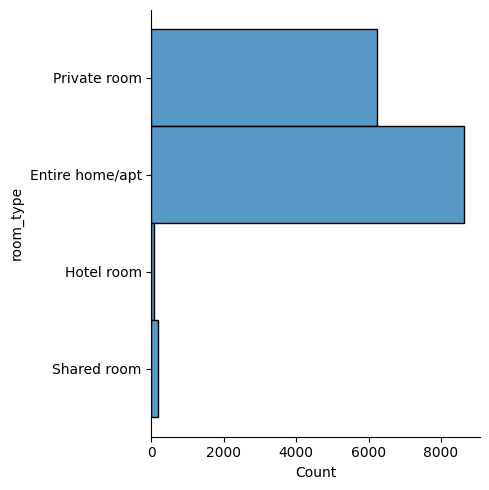

In [113]:
# distribution of room_type
sns.displot(data=full_df, y='room_type')
plt.show()

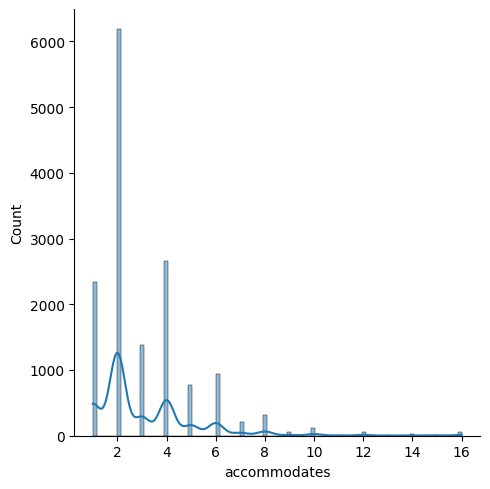

In [114]:
#distribution of accommodates
sns.displot(data=full_df, x='accommodates', kde=True)
plt.show()

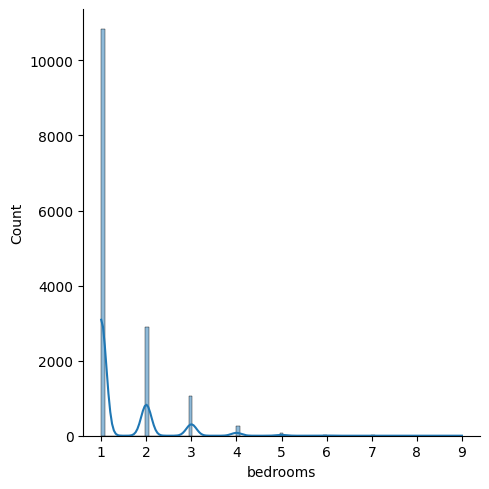

In [115]:
#distribution of bedrooms
sns.displot(data=full_df, x='bedrooms', kde=True)
plt.show()

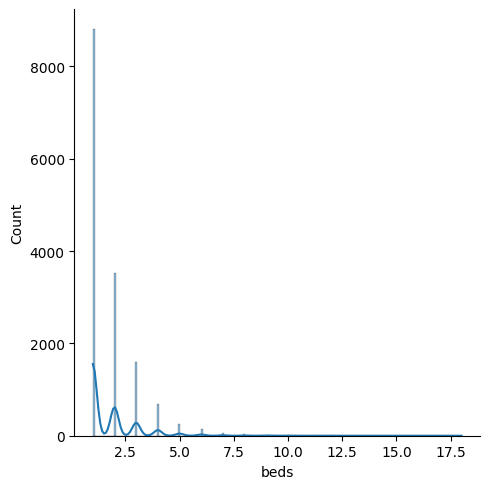

In [116]:
#distribution of beds
sns.displot(data=full_df, x='beds', kde=True)
plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


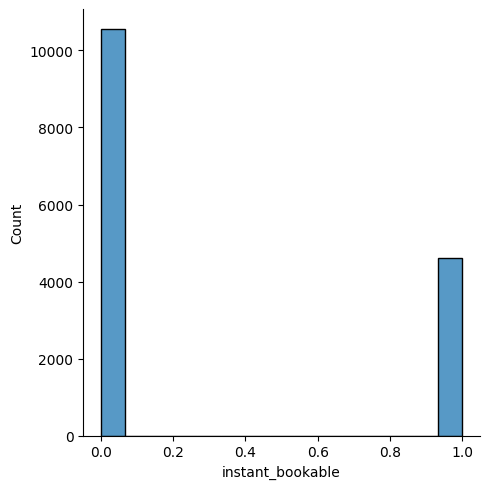

In [117]:
#distribution of instant_bookable
sns.displot(data=full_df, x='instant_bookable')
plt.show()

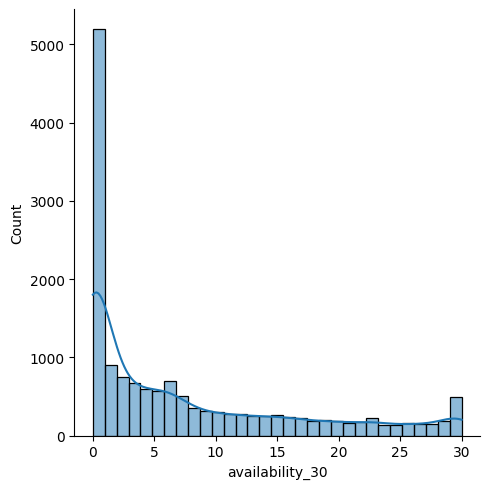

In [118]:
#distribution of availability_30
sns.displot(data=full_df, x='availability_30', kde=True)
plt.show()

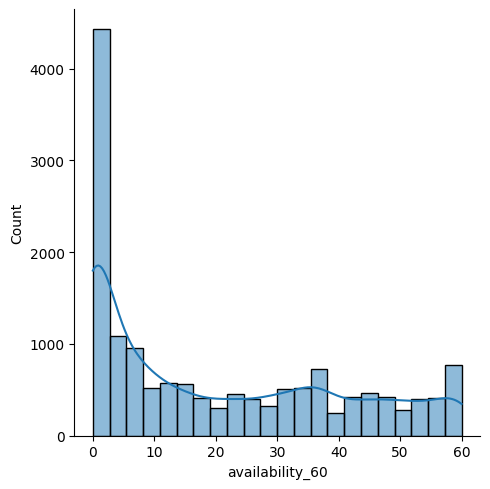

In [119]:
#distribution of availability_60
sns.displot(data=full_df, x='availability_60', kde=True)
plt.show()

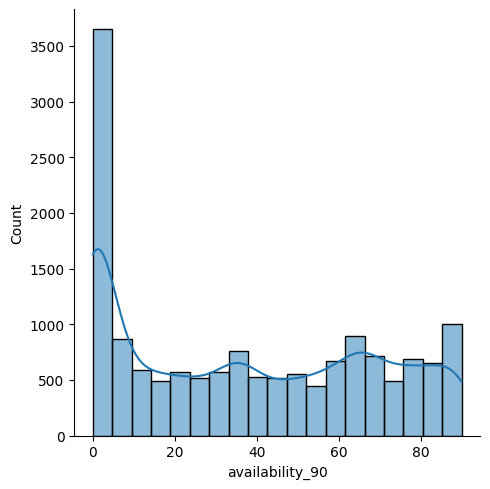

In [120]:
#distribution of availability_90
sns.displot(data=full_df, x='availability_90', kde=True)
plt.show()

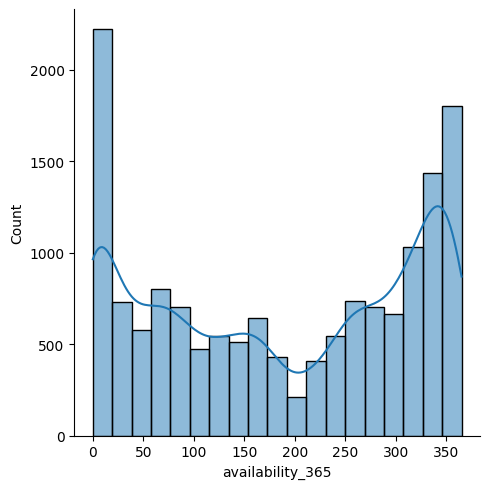

In [121]:
#distribution of availability_365
sns.displot(data=full_df, x='availability_365', kde=True)
plt.show()

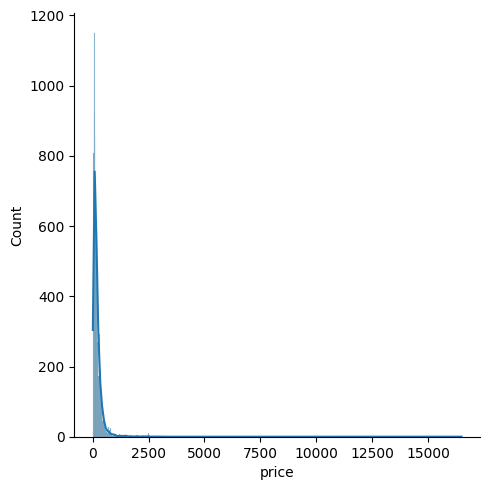

In [122]:
#distribution of price
sns.displot(data=full_df, x='price', kde=True)
plt.show()

# Feature Engineering

In [123]:
model_df = full_df.copy()
model_df.head()

,host_location,host_response_time,host_response_rate,host_neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,availability_30,availability_60,availability_90,availability_365,instant_bookable,price
0,"New York, NY",within an hour,100.0,Gravesend,Kensington,Brooklyn,40.64529,-73.97238,Private room in rental unit,Private room,2,1.0,1.0,21,51,81,356,False,299.0
1,"New York, NY",within an hour,100.0,Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,1.0,1.0,5,30,60,335,False,60.0
2,"New York, NY",within an hour,100.0,Ridgewood,Ridgewood,Queens,40.70309,-73.89963,Entire townhouse,Entire home/apt,16,5.0,10.0,30,60,90,365,False,425.0
3,"New York, United States",within an hour,99.0,Greenpoint,Greenpoint,Brooklyn,40.73777,-73.95366,Room in boutique hotel,Hotel room,2,1.0,1.0,15,42,72,217,False,308.0
4,"New York, NY",within a few hours,100.0,Hell's Kitchen,Midtown,Manhattan,40.76457,-73.98317,Private room in rental unit,Private room,2,1.0,1.0,2,4,7,160,False,68.0


In [124]:
#feature engineering from existing columns
model_df = pd.get_dummies(model_df, columns=['instant_bookable'], drop_first=True)
model_df = pd.get_dummies(model_df, columns=['room_type','property_type'], drop_first=True)
model_df = pd.get_dummies(model_df, columns=['neighbourhood_cleansed','neighbourhood_group_cleansed'], drop_first=True)
model_df = pd.get_dummies(model_df, columns=['host_response_time','host_neighbourhood'], drop_first=True)

#feature engineering from created columns
model_df['host_location_in_ny'] = np.where(model_df['host_location'].str.contains("NY|New York"), True, False)
model_df.drop("host_location", axis=1, inplace=True)
model_df = pd.get_dummies(model_df, columns=['host_location_in_ny'], drop_first=True)
model_df.head()

,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,availability_30,availability_60,availability_90,availability_365,...,host_neighbourhood_Woodrow,host_neighbourhood_Woodside,host_neighbourhood_Woodstock,host_neighbourhood_Wynwood,host_neighbourhood_Yehuda Hamaccabi,host_neighbourhood_Yorkville,host_neighbourhood_Zephyr Cove,host_neighbourhood_Zona Romántica,host_neighbourhood_Zona Sin Asignación de Nombre de Colonia 1,host_location_in_ny_True
0,100.0,40.64529,-73.97238,2,1.0,1.0,21,51,81,356,...,0,0,0,0,0,0,0,0,0,1
1,100.0,40.68535,-73.95512,2,1.0,1.0,5,30,60,335,...,0,0,0,0,0,0,0,0,0,1
2,100.0,40.70309,-73.89963,16,5.0,10.0,30,60,90,365,...,0,0,0,0,0,0,0,0,0,1
3,99.0,40.73777,-73.95366,2,1.0,1.0,15,42,72,217,...,0,0,0,0,0,0,0,0,0,1
4,100.0,40.76457,-73.98317,2,1.0,1.0,2,4,7,160,...,0,0,0,0,0,0,0,0,0,1


# Creating Machine Learning Model

In [125]:
X = model_df.drop("price", axis=1).values #features
y = model_df["price"].values #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [126]:
# testing Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

print("Train score: ",reg.score(X_train,y_train))
print("Testing score: ", reg.score(X_test,y_test))

Train score:  0.34600269230919145
Testing score:  -6.531298818968558e+17


In [127]:
#metrics for first model across entire dataset
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = LinearRegression()
cv_scores = cross_validate(reg, X, y, cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))

for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])}")
    print("\n")

r2 mean cross validate score: -1631213528482113.5


neg_mean_squared_error mean cross validate score: -2.0375896267390065e+20


neg_root_mean_squared_error mean cross validate score: -11051070724.35603


neg_mean_absolute_error mean cross validate score: -410143970.8829802




In [128]:
# finding important important features
features = model_df.drop("price", axis=1).columns
lasso = Lasso(alpha=0.3)
lasso.fit(X,y)

lasso_coef_df = pd.DataFrame({'feature': features , 'coef': lasso.coef_})

#top 30 most import features
lasso_coef_df[lasso_coef_df['coef'] > 0].sort_values('coef', ascending=False).reset_index(drop=True).head(10)

,feature,coef
0,host_neighbourhood_Downtown Vancouver,4403.006070
1,host_neighbourhood_Foxhurst,806.188737
2,host_neighbourhood_Clearwater Beach,402.870140
3,property_type_Room in boutique hotel,210.758122
4,property_type_Room in hotel,179.337164
5,neighbourhood_cleansed_SoHo,179.170012
6,host_neighbourhood_Cambridge,174.307385
7,neighbourhood_group_cleansed_Manhattan,161.040944
8,host_neighbourhood_Boerum Hill,88.011261
9,host_neighbourhood_Long Island City,82.649354


In [129]:
# finding important features 
threshold = 0.5
not_important_features = lasso_coef_df[(lasso_coef_df['coef'] > -threshold) & (lasso_coef_df['coef'] < threshold)]['feature'].values

#number of important features based on threshold var
len(model_df.columns) - len(list(not_important_features))

79

In [130]:
#creating a new df to reference the new features
new_model_df = model_df.drop(not_important_features, axis=1)
new_model_df["price"] = model_df['price']

new_model_df.head()

,longitude,accommodates,bedrooms,beds,availability_30,availability_60,price,instant_bookable_True,room_type_Hotel room,room_type_Shared room,...,host_neighbourhood_Long Island City,host_neighbourhood_Midtown,host_neighbourhood_Midtown East,host_neighbourhood_Murray Hill,host_neighbourhood_Park Slope,host_neighbourhood_Upper East Side,host_neighbourhood_Upper West Side,host_neighbourhood_Washington Heights,host_neighbourhood_Williamsburg,host_location_in_ny_True
0,-73.97238,2,1.0,1.0,21,51,299.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-73.95512,2,1.0,1.0,5,30,60.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-73.89963,16,5.0,10.0,30,60,425.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-73.95366,2,1.0,1.0,15,42,308.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,-73.98317,2,1.0,1.0,2,4,68.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [131]:
#testing with reduced features
X2 = new_model_df.values #features
y2 = new_model_df["price"].values #target

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

reg2 = LinearRegression()
reg2.fit(X_train2, y_train2)

print("Train score: ",reg2.score(X_train2,y_train2))
print("Testing score: ",reg2.score(X_test2,y_test2))

Train score:  1.0
Testing score:  1.0


In [132]:
#metrics for first model across entire dataset with reduced features
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = LinearRegression()
cv_scores = cross_validate(reg, X2, y2,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])}")
    print("\n")

r2 mean cross validate score: 1.0


neg_mean_squared_error mean cross validate score: -9.264510131021457e-25


neg_root_mean_squared_error mean cross validate score: -7.90418861453235e-13


neg_mean_absolute_error mean cross validate score: -3.7674293607159545e-13




## Linear Regression Model Conclusion
The original dataset with 750 features did very poorly with a Linear Regression model as seen with Mean Squared Error being so high. We assume that we had a lot noise in our model intake therefore we decided to reduced our features down. We preformed regularization with a Lasso model where we looked at the coefficients tied to eat feature and removed features where the absolute value of the coefficients were less than 0.5. After reducing the number of features by almost 90%, we saw improvements in our four metrics: R^2, Mean Squared Error, Root Mean Squared Error, and Mean Absolute Error

# KNN

In [133]:
#testing with original features
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train)

print("Train score: ", neigh.score(X_train,y_train))
print("Testing score: ", neigh.score(X_test,y_test))

Train score:  0.6054997873538182
Testing score:  0.06790932386966575


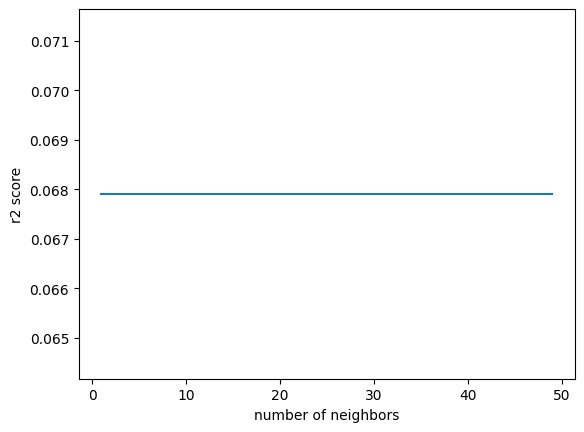

In [134]:
#Testing if the number of neighbors have any influence
ns = np.arange(1,50)
test_score = []
for n in ns:
    knn = KNeighborsRegressor(n_neighbors=n)
    neigh.fit(X_train, y_train)
    test_score.append(neigh.score(X_test,y_test))

plt.plot(ns, test_score)
plt.xlabel('number of neighbors')
plt.ylabel('r2 score')
plt.show()

In [135]:
#metrics for second model across entire dataset
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X, y, cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])}")
    print("\n")

r2 mean cross validate score: 0.09272089057442438


neg_mean_squared_error mean cross validate score: -91366.34644481857


neg_root_mean_squared_error mean cross validate score: -297.46289224242264


neg_mean_absolute_error mean cross validate score: -104.68158974095589




In [136]:
#metrics for second model across entire dataset with reduced features
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X2, y2,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])}")
    print("\n")

r2 mean cross validate score: 0.9790985712270244


neg_mean_squared_error mean cross validate score: -3189.8947949513395


neg_root_mean_squared_error mean cross validate score: -38.79105904764539


neg_mean_absolute_error mean cross validate score: -1.5297240447362013




## KNN Model Conclusion
The original dataset with 750 features did very poorly with a KNN model as seen with Mean Squared Error being so high but better than a Linear Regression model. We also assume that we had a lot noise in our model intake therefore we decided to reduced our features down. We used the same 79 features used in last model therefore we saw improvements in our four metrics: R^2, Mean Squared Error, Root Mean Squared Error, and Mean Absolute Error. It was wasn't as great as the Linear Regression model. We assume that we still needed to scale our features since KNN used distance making decisions. Maybe after scaling our features we could see improvements that are similar or better than Linear Regression

# Decision Tree

In [137]:
#testing with original features
regressor = DecisionTreeRegressor(random_state=42, )
regressor.fit(X_train, y_train)

print("Train score: ", regressor.score(X_train,y_train))
print("Testing score: ", regressor.score(X_test,y_test))

Train score:  0.9609720572764259
Testing score:  0.02080572351313248


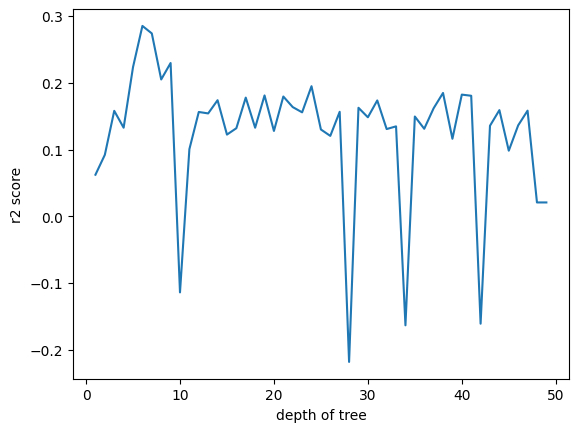

In [138]:
#Testing if the depth of the tree have any influence on test scores
ns = np.arange(1,50)
test_score = []
for n in ns:
    regressor = DecisionTreeRegressor(random_state=42, max_depth=n)
    regressor.fit(X_train, y_train)
    test_score.append(regressor.score(X_test,y_test))

plt.plot(ns, test_score)
plt.xlabel('depth of tree')
plt.ylabel('r2 score')
plt.show()

In [139]:
#metrics for third model across entire dataset 
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeRegressor(random_state=42, max_depth=8)
cv_scores = cross_validate(dt, X, y, cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])}")
    print("\n")

r2 mean cross validate score: 0.1185062694324748


neg_mean_squared_error mean cross validate score: -87747.18684679497


neg_root_mean_squared_error mean cross validate score: -291.3691291394156


neg_mean_absolute_error mean cross validate score: -82.7013747888719




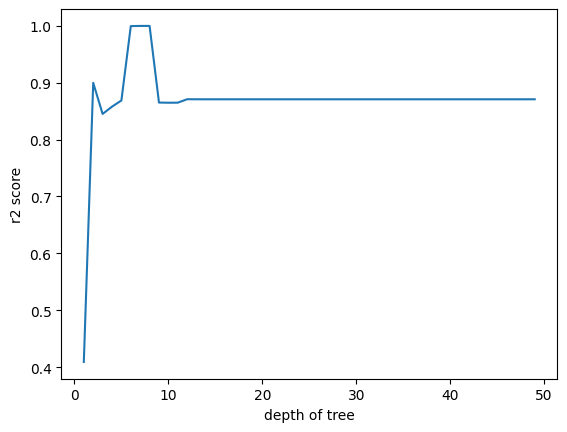

In [140]:
#Testing if the depth of the tree have any influence on test scores with reduced features
ns = np.arange(1,50)
test_score = []
for n in ns:
    regressor = DecisionTreeRegressor(random_state=42, max_depth=n)
    regressor.fit(X_train2, y_train2)
    test_score.append(regressor.score(X_test2,y_test2))

plt.plot(ns, test_score)
plt.xlabel('depth of tree')
plt.ylabel('r2 score')
plt.show()

In [141]:
#metrics for third model across entire dataset with reduced features
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeRegressor(random_state=42, max_depth=11)
cv_scores = cross_validate(dt, X2, y2,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])}")
    print("\n")

r2 mean cross validate score: 0.9096719274502064


neg_mean_squared_error mean cross validate score: -11410.90409727758


neg_root_mean_squared_error mean cross validate score: -88.07556580467684


neg_mean_absolute_error mean cross validate score: -2.0526880258802875




## Decision Tree Model Conclusion
The original dataset with 750 features did better with a KNN model when compared to Linear Regression and KNN models as seen with Mean Squared Error. We also assume that we had a lot noise in our model intake therefore we decided to reduced our features down. We used the same 79 features used in last model therefore we saw improvements in our four metrics: R^2, Mean Squared Error, Root Mean Squared Error, and Mean Absolute Error. It was wasn't as great as the Linear Regression model. We assume changing some hyper parameters would result in improvements that could be similar or better than Linear Regression.

# Overall Conclusion
From testing Linear Regression, KNN, and Decision Tree models, we know that there are features that are less important since after reducing the number of features by 90% we see a major improvements in R^2, Mean Squared Error, Root Mean Squared Error, and Mean Absolute Error scores. Maybe if we change the threshold from 0.5 down to 0.1 we could see improvements but only marginally small ones. As for now, the Linear Regression model is our best model to accurately predict a listing price in New York City.

# Testing bathrooms_text with Linear Regression

In [142]:
important_columns = [
    # 'name',
    # 'description',
    'host_location',
    'host_response_time',
    'host_response_rate',
    'host_neighbourhood',
    'neighbourhood_cleansed',
    'neighbourhood_group_cleansed',
    'latitude',
    'longitude',
    'property_type',
    'room_type',
    'accommodates',
    'bathrooms_text',
    'bedrooms',
    'beds',
    # 'amenities',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'instant_bookable',
    'price'
    ]
df_with_bathrooms = data[important_columns]
df_with_bathrooms.shape

(39881, 20)

In [143]:
df_with_bathrooms = df_with_bathrooms.dropna(subset=['bathrooms_text'])
df_with_bathrooms = df_with_bathrooms.dropna().drop_duplicates().reset_index(drop=True)

df_with_bathrooms.shape

(15152, 20)

In [144]:
#helper functions
def getSharedStatus(data):
    return ('shared' in data or 'Shared' in data)

def getHalfBathStatus(data):
    return ('half-bath' in data)

def getPrivateStatus(data):
    return ('Private' in data)

def getNumberofBathrooms(data):
    splits = data.split(" ")[0]
    num = splits[0]
    try:
        num = int(num)
        return num
    except:
        return 1

In [145]:
#feature engineering from existing columns
df_with_bathrooms = pd.get_dummies(df_with_bathrooms, columns=['instant_bookable'], drop_first=True)
df_with_bathrooms = pd.get_dummies(df_with_bathrooms, columns=['room_type','property_type'], drop_first=True)
df_with_bathrooms = pd.get_dummies(df_with_bathrooms, columns=['neighbourhood_cleansed','neighbourhood_group_cleansed'], drop_first=True)
df_with_bathrooms = pd.get_dummies(df_with_bathrooms, columns=['host_response_time','host_neighbourhood'], drop_first=True)

#feature engineering from created columns
df_with_bathrooms['host_location_in_ny'] = np.where(df_with_bathrooms['host_location'].str.contains("NY|New York"), True, False)
df_with_bathrooms.drop("host_location", axis=1, inplace=True)
df_with_bathrooms = pd.get_dummies(df_with_bathrooms, columns=['host_location_in_ny'], drop_first=True)

#feature engineering the bathrooms_text column
df_with_bathrooms['bathroomShared'] = df_with_bathrooms['bathrooms_text'].apply(getSharedStatus)
df_with_bathrooms['isBathroomHalf'] = df_with_bathrooms['bathrooms_text'].apply(getHalfBathStatus)
df_with_bathrooms['isBathroomPrivate'] = df_with_bathrooms['bathrooms_text'].apply(getPrivateStatus)
df_with_bathrooms['numberOfBathrooms'] = df_with_bathrooms['bathrooms_text'].apply(getNumberofBathrooms)
df_with_bathrooms.drop('bathrooms_text', axis=1, inplace=True)

In [146]:
# recapturing data features and target
X = df_with_bathrooms.drop('price', axis=1).values #features
y = df_with_bathrooms["price"].values #target

In [147]:
#metrics for best model across entire dataset with bathroom features included
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
bath_reg = LinearRegression()
cv_scores = cross_validate(bath_reg, X, y,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])}")
    print("\n")

r2 mean cross validate score: -484819918808754.3


neg_mean_squared_error mean cross validate score: -4.980575132963217e+19


neg_root_mean_squared_error mean cross validate score: -4765130618.745815


neg_mean_absolute_error mean cross validate score: -141282268.58990997




In [148]:
# finding important important features
features = df_with_bathrooms.drop("price", axis=1).columns
lasso = Lasso(alpha=0.3)
lasso.fit(X,y)

lasso_coef_df = pd.DataFrame({'feature': features , 'coef': lasso.coef_})

In [149]:
# finding if bathroom features are important
bathroom_features = ['bathroomShared', 'isBathroomHalf', 'isBathroomPrivate','numberOfBathrooms']
for feature in bathroom_features:
    display(lasso_coef_df[lasso_coef_df['feature'] == feature].reset_index(drop=True))

,feature,coef
0,bathroomShared,-20.257174


,feature,coef
0,isBathroomHalf,-0.0


,feature,coef
0,isBathroomPrivate,-0.0


,feature,coef
0,numberOfBathrooms,140.078128


In [150]:
# finding less important features
threshold = 0.05
not_important_features = lasso_coef_df[(lasso_coef_df['coef'] > -threshold) & (lasso_coef_df['coef'] < threshold)]['feature'].values

#number of important features based on threshold var
len(df_with_bathrooms.columns) - len(list(not_important_features))

85

In [151]:
#creating a new df to reference the new features
new_df_with_bathrooms = df_with_bathrooms.drop(not_important_features, axis=1)

In [152]:
#testing with reduced features
X2 = new_df_with_bathrooms.drop('price',axis=1).values #features
y2 = new_df_with_bathrooms["price"].values #target

In [153]:
#metrics for best model across entire dataset with bathroom features included
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
bath_reg = LinearRegression()
cv_scores = cross_validate(bath_reg, X2, y2,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])}")
    print("\n")

r2 mean cross validate score: 0.2983160603909717


neg_mean_squared_error mean cross validate score: -74182.82678874387


neg_root_mean_squared_error mean cross validate score: -266.2634101535768


neg_mean_absolute_error mean cross validate score: -91.7324884338374




# Bathroom Conclusions
After creating new features centered around the bathroom (is bathroom a half bath, is bathroom private, numberOfBathrooms, and is bathroom shared) we tested with Linear Regression model that had these some of the important bathroom features in it. The results from these test was it provided more confusion in our model which seems the out of character as one may assume that the number of bathrooms would have influence on listing price. Maybe changing the threshold to number higher could improve our model but we will need to test that further.

# Testing amenities with Linear Regression

In [154]:
important_columns = [
    # 'name',
    # 'description',
    'host_location',
    'host_response_time',
    'host_response_rate',
    'host_neighbourhood',
    'neighbourhood_cleansed',
    'neighbourhood_group_cleansed',
    'latitude',
    'longitude',
    'property_type',
    'room_type',
    'accommodates',
    # 'bathrooms_text',
    'bedrooms',
    'beds',
    'amenities',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'instant_bookable',
    'price'
    ]
df_with_amenities = data[important_columns]
df_with_amenities = df_with_amenities.dropna().drop_duplicates().reset_index(drop=True)

In [155]:
#feature engineering from existing columns
df_with_amenities = pd.get_dummies(df_with_amenities, columns=['instant_bookable'], drop_first=True)
df_with_amenities = pd.get_dummies(df_with_amenities, columns=['room_type','property_type'], drop_first=True)
df_with_amenities = pd.get_dummies(df_with_amenities, columns=['neighbourhood_cleansed','neighbourhood_group_cleansed'], drop_first=True)
df_with_amenities = pd.get_dummies(df_with_amenities, columns=['host_response_time','host_neighbourhood'], drop_first=True)

#feature engineering from created columns
df_with_amenities['host_location_in_ny'] = np.where(df_with_amenities['host_location'].str.contains("NY|New York"), True, False)
df_with_amenities.drop("host_location", axis=1, inplace=True)
df_with_amenities = pd.get_dummies(df_with_amenities, columns=['host_location_in_ny'], drop_first=True)

In [156]:
#feature engineering with amenities column
amenities = {}
for amenities_set in df_with_amenities.amenities.values:
    amenities_set = amenities_set.strip('][').replace('"',"").split(', ')
    for item in amenities_set:
        amenities[item] = amenities.get(item, 0) + 1
        
#number of unique amenities
print("number of unique amenities", len(amenities.keys()))

list_function = lambda row: row.strip('][').replace('"',"").split(', ')
df_with_amenities['amenities'] = df_with_amenities.amenities.apply(list_function)
mlb = MultiLabelBinarizer()

amenities_df = pd.DataFrame(mlb.fit_transform(df_with_amenities['amenities']),columns=mlb.classes_, index=df_with_amenities.index)
df_with_amenities = df_with_amenities.join(amenities_df)
df_with_amenities.drop(['amenities'], axis=1, inplace=True)

number of unique amenities 3359


In [157]:
# recapturing data features and target
X = df_with_amenities.drop('price', axis=1).values #features
y = df_with_amenities["price"].values #target

In [158]:
#metrics for best model across entire dataset with amenities features included
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
am_reg = LinearRegression()
cv_scores = cross_validate(am_reg, X, y,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])}")
    print("\n")

r2 mean cross validate score: -6.701551273313171e+16


neg_mean_squared_error mean cross validate score: -5.274388842292567e+21


neg_root_mean_squared_error mean cross validate score: -54674728504.084724


neg_mean_absolute_error mean cross validate score: -6131523786.712558




In [159]:
# finding important important features
features = df_with_amenities.drop("price", axis=1).columns
lasso = Lasso(alpha=0.3)
lasso.fit(X,y)

lasso_coef_df = pd.DataFrame({'feature': features , 'coef': lasso.coef_})

lasso_coef_df['coef_'] = lasso_coef_df.coef.apply(abs)
lasso_coef_df.sort_values('coef_', ascending=False)[['feature','coef_']].reset_index(drop=True).head(25)

,feature,coef_
0,Facial rice soap and Sandal Wood Soap. body soap,10817.719414
1,host_neighbourhood_Downtown Vancouver,4368.975031
2,host_neighbourhood_Foxhurst,693.917298
3,32\ TV,489.754665
4,host_neighbourhood_Clearwater Beach,323.654926
5,Various conditioner,271.020510
6,neighbourhood_cleansed_SoHo,184.026029
7,neighbourhood_group_cleansed_Manhattan,144.940796
8,property_type_Room in hotel,126.832438
9,Gym,105.879957


In [160]:
# finding less important features
threshold = 0.05
not_important_features = lasso_coef_df[(lasso_coef_df['coef'] > -threshold) & (lasso_coef_df['coef'] < threshold)]['feature'].values

#number of important features based on threshold var
len(df_with_amenities.columns) - len(list(not_important_features))

170

In [161]:
#creating a new df to reference the reduced features
new_df_with_amenities = df_with_amenities.drop(not_important_features, axis=1)

In [162]:
#testing with reduced features
X2 = new_df_with_amenities.drop('price',axis=1).values #features
y2 = new_df_with_amenities["price"].values #target

In [163]:
#metrics for best model across entire dataset with amenities features included
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
am_reg = LinearRegression()
cv_scores = cross_validate(am_reg, X2, y2,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])}")
    print("\n")

r2 mean cross validate score: 0.3023849683516408


neg_mean_squared_error mean cross validate score: -76272.90880029216


neg_root_mean_squared_error mean cross validate score: -264.6226148096195


neg_mean_absolute_error mean cross validate score: -92.03625149060186




# Testing emotions within name and descriptions of listings

In [164]:
important_columns = [
    'name',
    'description',
    'host_location',
    'host_response_time',
    'host_response_rate',
    'host_neighbourhood',
    'neighbourhood_cleansed',
    'neighbourhood_group_cleansed',
    'latitude',
    'longitude',
    'property_type',
    'room_type',
    'accommodates',
    # 'bathrooms_text',
    'bedrooms',
    'beds',
    # 'amenities',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'instant_bookable',
    'price'
    ]
df_with_description = data[important_columns]
df_with_description = df_with_description.dropna().drop_duplicates().reset_index(drop=True)
df_with_description.head()

,name,description,host_location,host_response_time,host_response_rate,host_neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,...,room_type,accommodates,bedrooms,beds,availability_30,availability_60,availability_90,availability_365,instant_bookable,price
0,Clean & quiet apt home by the park,Renovated apt home in elevator building.<br />...,"New York, NY",within an hour,100.0,Gravesend,Kensington,Brooklyn,40.64529,-73.97238,...,Private room,2,1.0,1.0,21,51,81,356,False,299.0
1,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,"New York, NY",within an hour,100.0,Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,...,Private room,2,1.0,1.0,5,30,60,335,False,60.0
2,Beautiful Queens Brownstone! - 5BR,"<b>The space</b><br />Beautiful, fully furnish...","New York, NY",within an hour,100.0,Ridgewood,Ridgewood,Queens,40.70309,-73.89963,...,Entire home/apt,16,5.0,10.0,30,60,90,365,False,425.0
3,Superior @ Box House,<b>The space</b><br />Charming standard queen ...,"New York, United States",within an hour,99.0,Greenpoint,Greenpoint,Brooklyn,40.73777,-73.95366,...,Hotel room,2,1.0,1.0,15,42,72,217,False,308.0
4,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"New York, NY",within a few hours,100.0,Hell's Kitchen,Midtown,Manhattan,40.76457,-73.98317,...,Private room,2,1.0,1.0,2,4,7,160,False,68.0
